## Introduction to Pandas 

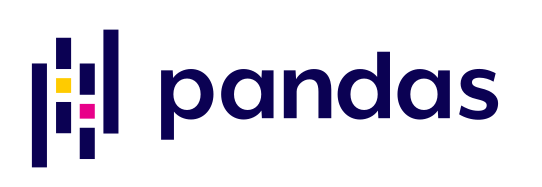

## Installation and Import

```
conda install pandas -c conda-forge
```

In [2]:
import pandas as pd

## Pandas Data Structures

| Data Structure | Dimensionality | Spreadsheet Analog | Database Analog | Linear Algebra |
|----------------|----------------|--------------------|-----------------|----------------|
| Series         | 1D             | Column             | Column          | Column Vector  |
| DataFrame      | 2D             | Single Sheet       | Table           | Matrix         |

<font size="2">Source: M.Harrison - Effective Pandas</font>

## Pandas Series

 - a `Series` is used to model one-dimensional data (similar to an array, list, vector or a column in a table)
 - it contains an array of **data** (of any NumPy data type) and an associated array of data labels, its **index**
 - it behaves similarly to a NumPy array and shares common methods, like `mean`, `min`, `max` and many more

### Generating Pandas Series from Python lists

In [3]:
nums = pd.Series([42, 314, 2, '17'])
nums

0     42
1    314
2      2
3     17
dtype: object

In [4]:
nums.values

array([42, 314, 2, '17'], dtype=object)

In [5]:
nums.index

RangeIndex(start=0, stop=4, step=1)

### Specifying an index

- instead of using the default index you can specify your own index and use it to access the data in the `Series`

In [20]:
nums = pd.Series([42, 314, 2, 17], index=['p', 'y', 't', 'h'])

In [21]:
# read and write values 
print(f"nums['t'] = {nums['t']}")
nums['t'] = 0
print(nums)

nums['t'] = 2
p     42
y    314
t      0
h     17
dtype: int64


### NumPy array operations preserve index-value link

In [22]:
nums[nums < 314]

p    42
t     0
h    17
dtype: int64

In [23]:
nums * 5

p     210
y    1570
t       0
h      85
dtype: int64

### In-place index change 

In [24]:
nums.index = ['a', 'b', 'c', 'd']
nums

a     42
b    314
c      0
d     17
dtype: int64

### `Series` from Python dictionaries

In [25]:
residents = {'Munich': 1_563_723, 'Landshut': 73_065, 'Freising': 48_872}
residents = pd.Series(residents)
residents, type(residents)

(Munich      1563723
 Landshut      73065
 Freising      48872
 dtype: int64,
 pandas.core.series.Series)

### Naming the data array

- in addition to the index and the data array you can provide a name attribute to the `Series` object

In [26]:
residents.name = "population"
residents

Munich      1563723
Landshut      73065
Freising      48872
Name: population, dtype: int64

### Missing values 

In [33]:
cities = ['Munich', 'Landshut', 'Freising', 'Ingolstadt']
residents = pd.Series(residents, index=cities)
residents

Munich        1563723.0
Landshut        73065.0
Freising        48872.0
Ingolstadt          NaN
Name: population, dtype: float64

### Detect missing values

In [28]:
pd.isnull(residents)

Munich        False
Landshut      False
Freising      False
Ingolstadt     True
Name: population, dtype: bool

In [36]:
pd.notnull(residents)

Munich         True
Landshut       True
Freising       True
Ingolstadt    False
Name: population, dtype: bool

### Data alignment 

In [35]:
resident_update = pd.Series({'Munich': 2_543, 'Regensburg': 152_270})
residents + resident_update

Freising            NaN
Ingolstadt          NaN
Landshut            NaN
Munich        1566266.0
Regensburg          NaN
dtype: float64

### Aggregation 

- you can use the `agg` method to compute multiple different aggregations 

In [34]:
residents.agg(['mean', 'min', 'max', 'std', 'size'])

mean    5.618867e+05
min     4.887200e+04
max     1.563723e+06
std     8.677000e+05
size    4.000000e+00
Name: population, dtype: float64

### Conversion and Memory Usage

- to compute the memory usage of a `Series` you can use the `.nbytes` property or the `.memory_usage` method
- `.astype` can be used to convert the data to a different data type

In [37]:
residents = {'Munich': 1_563_723, 'Landshut': 73_065, 'Freising': 48_872}
residents = pd.Series(residents)
residents.nbytes # shows only how much memory the Pandas object is taking

24

In [45]:
residents.memory_usage(deep=True) # includes the index memory and can include the contribution from object types

193

In [40]:
residents.astype('int32').nbytes

12

In [43]:
residents.astype('int32').memory_usage()

36

## Pandas DataFrame

- a Pandas `DataFrame` is the two-dimensional counterpart to the one-dimensional `Series`
- we think of a dataframe as <font color="red">column-oriented</font>, where each column is a `Series` (think of it as a dict of `Series`)
- it represents a tabular, <font color="red">spreadsheet-like data structure</font> containing an ordered collection of columns
- rows in a dataframe are accessed via the index and columns are accessible from the column name
- the columns can have different value types (numeric, string, boolean, etc.)

### Working with DataFrames

In [72]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### [Retrieving rows by index](https://pandas.pydata.org/docs/user_guide/indexing.html)

- you can use `.loc` or `.iloc` for location-based indexing
- `.loc` is primarily label based
- `.iloc` is primarily integer position based

In [73]:
iris.iloc[3]

sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
Name: 3, dtype: object

In [74]:
iris.iloc[3, 0]

4.6

In [75]:
iris.iloc[3, 0:2] # slicing works

sepal_length    4.6
sepal_width     3.1
Name: 3, dtype: object

### Retrieving columns by column name

In [76]:
iris['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [77]:
sepal_width = iris.sepal_width.astype('float32')
sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float32

In [78]:
iris[['sepal_width', 'sepal_length']]

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


### Adding new columns

In [79]:
iris['new_col'] = 3.14
iris

,sepal_length,sepal_width,petal_length,petal_width,species,new_col
0,5.1,3.5,1.4,0.2,setosa,3.14
1,4.9,3.0,1.4,0.2,setosa,3.14
2,4.7,3.2,1.3,0.2,setosa,3.14
3,4.6,3.1,1.5,0.2,setosa,3.14
4,5.0,3.6,1.4,0.2,setosa,3.14
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.14
146,6.3,2.5,5.0,1.9,virginica,3.14
147,6.5,3.0,5.2,2.0,virginica,3.14
148,6.2,3.4,5.4,2.3,virginica,3.14


### Replacing columns

In [80]:
import numpy as np
iris['new_col'] = np.arange(150.)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,new_col
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0
2,4.7,3.2,1.3,0.2,setosa,2.0
3,4.6,3.1,1.5,0.2,setosa,3.0
4,5.0,3.6,1.4,0.2,setosa,4.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,145.0
146,6.3,2.5,5.0,1.9,virginica,146.0
147,6.5,3.0,5.2,2.0,virginica,147.0
148,6.2,3.4,5.4,2.3,virginica,148.0


### Deleting columns

In [81]:
del iris['new_col']
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Dropping entries from an axis

In [83]:
iris = iris.drop('petal_width', axis=1) # drop column (axis=1) petal_width -- default is axis=0
iris

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
...,...,...,...,...
145,6.7,3.0,5.2,virginica
146,6.3,2.5,5.0,virginica
147,6.5,3.0,5.2,virginica
148,6.2,3.4,5.4,virginica


In [84]:
iris = iris.drop(0) # drop first row
iris

,sepal_length,sepal_width,petal_length,species
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
5,5.4,3.9,1.7,setosa
...,...,...,...,...
145,6.7,3.0,5.2,virginica
146,6.3,2.5,5.0,virginica
147,6.5,3.0,5.2,virginica
148,6.2,3.4,5.4,virginica


### Filtering 

- filtering works the same way as for `Series`, but now you can apply it to multiple columns in parallel

In [85]:
iris.iloc[1:10, 1:3] < 1.5

,sepal_width,petal_length
2,False,True
3,False,False
4,False,True
5,False,False
6,False,True
7,False,False
8,False,True
9,False,False
10,False,False


### Function application and mapping 

In [86]:
def f(x):
    return pd.Series([x.mean(), x.std()], index=['mean', 'std'])

In [87]:
iris.iloc[:, 0:3].apply(f) # applied to axis=0 by default; axis can be changed to axis=1 

,sepal_length,sepal_width,petal_length
mean,5.848322,3.054362,3.773826
std,0.828594,0.435810,1.760543


### Element-wise application of functions

In [88]:
def inc(x):
    return x + 1

In [99]:
iris.iloc[:, 0:3].applymap(inc).head()

/var/folders/wk/lvhvm_2j0qz86pj3f3dl9t9w0000gn/T/ipykernel_11531/3870455985.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  iris.iloc[:, 0:3].applymap(inc).head()


,sepal_length,sepal_width,petal_length
1,5.9,4.0,2.4
2,5.7,4.2,2.3
3,5.6,4.1,2.5
4,6.0,4.6,2.4
5,6.4,4.9,2.7


## Example - Movie Lens Dataset 
(from [Python for Data Analysis by Wes McKinney](https://github.com/wesm/pydata-book))

In [91]:
encoding = 'latin1'

upath = './data/movielens/users.dat'
rpath = './data/movielens/ratings.dat'
mpath = './data/movielens/movies.dat'

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding, engine='python')
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding, engine='python')
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding, engine='python')

In [92]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [93]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [94]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Merging dataframes

- to simplify our analysis of the data we can merge the 3 dataframes into one 
- if you don't specify the keys for the merge (join) Pandas infers which columns to use for the merge based on overlapping names

In [102]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


### Cross-tabulation with Pandas

- [Wikipedia](https://en.wikipedia.org/wiki/Pivot_table): A **pivot table** is a table of grouped values that aggregates the individual items of a more extensive table within one or more discrete categories
- we are interested in mean movie ratings for each film grouped by gender and will use the `pivot_table` function 

In [100]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### Counting the number of ratings

In [103]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

### Filtering for movies with at least 250 ratings

In [104]:
ratings_by_title[ratings_by_title >= 250]

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [108]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


### Measuring rating disagreement

In [109]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff.head(n=10)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [110]:
sorted_by_diff.tail(n=10)

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


### Movies that elicited the most disagreement among viewers

In [111]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title[active_titles]  # choose only title with more than 250 ratings
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [115]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## Literature

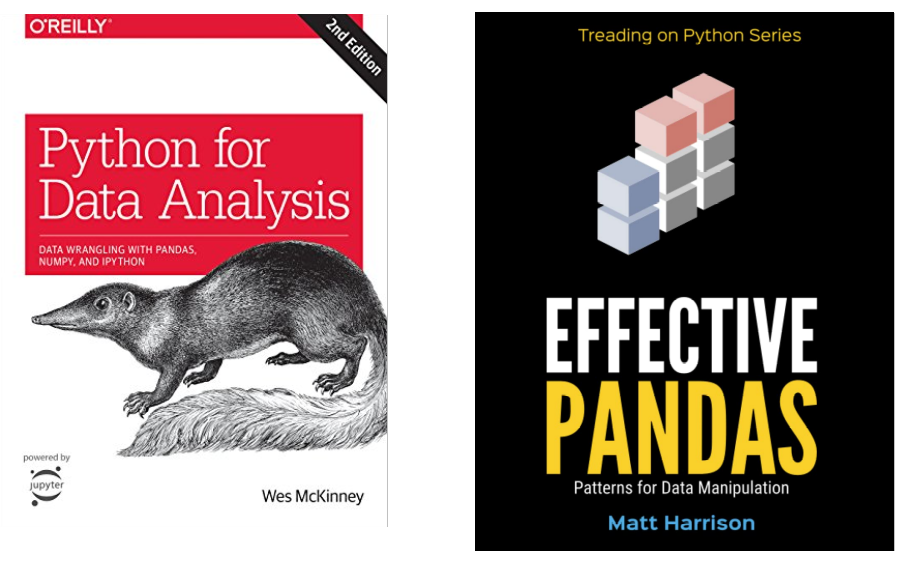

## Learning Resources

- the code for _Python for Data Analysis by Wes McKinney_ is available (MIT Licence) at [https://github.com/wesm/pydata-book](https://github.com/wesm/pydata-book)
- [Gred Reda's introduction](https://gregreda.com/2013/10/26/intro-to-pandas-data-structures/) to Pandas datastructures
- if you prefer watching videos instead of reading books or tutorials / blogs:
  - data school -- [data analysis in Python with Pandas video series](https://www.dataschool.io/easier-data-analysis-with-pandas/)
  - [Tom Augspurger PyData Seattle 2015 Pandas: .head() to .tail() tutorial](https://youtu.be/otCriSKVV_8)